<a href="https://colab.research.google.com/github/daffaaliefta/Colab_DataMining/blob/main/tugas_4_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS DATA MINING WEEK 4

# Daffa Alieftahalim
# 1202223174
# SI-46-10

# Import Library & Read Data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_excel('Dataset_Tugas Week 4.xlsx')
df

,Gender,Age,Diagnose,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG
0,L,1,DM TYPE 2,12.6,37.1,7130.0,4.09,241000.0,10.6,150.0
1,P,1,DM TYPE 2 + Penyerta,11.3,33.6,13730.0,3.96,259000.0,5.0,33.0
2,P,1,DM TYPE 2 + Penyerta,13.3,39.5,8330.0,4.47,340000.0,9.2,161.0
3,P,1,DM TYPE 2 + Penyerta,14.2,41.6,15680.0,4.95,364000.0,10.8,425.0
4,L,1,DM TYPE 2,12.1,36.2,20590.0,5.33,333000.0,11.0,247.0
...,...,...,...,...,...,...,...,...,...,...
995,L,59,DM TYPE 2 + Penyerta,12.3,36.6,15850.0,4.14,412000.0,NaN,44.0
996,P,60,DM TYPE 2,13.1,38.5,9510.0,4.53,373000.0,4.3,250.0
997,P,60,DM TYPE 2,13.3,40.8,20560.0,4.51,380000.0,5.0,329.0
998,P,60,DM TYPE 2 + Penyerta,15.4,47.3,14320.0,5.32,390000.0,5.2,197.0


# Data Cleansing

## Duplikasi Data

In [ ]:
df.duplicated().sum()

30

In [ ]:
df_duplicate = df.drop_duplicates()

In [ ]:
df_duplicate.duplicated().sum()

0

In [ ]:
df_duplicate.head()

,Gender,Age,Diagnose,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG
0,L,1,DM TYPE 2,12.6,37.1,7130.0,4.09,241000.0,10.6,150.0
1,P,1,DM TYPE 2 + Penyerta,11.3,33.6,13730.0,3.96,259000.0,5.0,33.0
2,P,1,DM TYPE 2 + Penyerta,13.3,39.5,8330.0,4.47,340000.0,9.2,161.0
3,P,1,DM TYPE 2 + Penyerta,14.2,41.6,15680.0,4.95,364000.0,10.8,425.0
4,L,1,DM TYPE 2,12.1,36.2,20590.0,5.33,333000.0,11.0,247.0


## Data Null

In [ ]:
df_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      970 non-null    object 
 1   Age         970 non-null    int64  
 2   Diagnose    970 non-null    object 
 3   Hemoglobin  937 non-null    float64
 4   Hematokrit  937 non-null    float64
 5   Lekosit     937 non-null    float64
 6   Eritrosit   937 non-null    float64
 7   Trombosit   936 non-null    float64
 8   HbA1c       645 non-null    float64
 9   RBG         918 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 83.4+ KB


In [ ]:
df_duplicate.isnull().sum()

,0
Gender,0
Age,0
Diagnose,0
Hemoglobin,33
Hematokrit,33
Lekosit,33
Eritrosit,33
Trombosit,34
HbA1c,325
RBG,52


In [ ]:
df_null = df_duplicate.dropna(subset=['Hemoglobin', 'Hematokrit', 'Lekosit', 'Eritrosit', 'Trombosit'])

In [ ]:
df_null.isnull().sum()

,0
Gender,0
Age,0
Diagnose,0
Hemoglobin,0
Hematokrit,0
Lekosit,0
Eritrosit,0
Trombosit,0
HbA1c,292
RBG,20


## Data Outlier

In [ ]:
df_null.describe()

,Age,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,644.000000,916.000000
mean,47.789530,12.789209,37.630459,15619.188034,4.563739,349691.067308,11.342096,380.254367
std,11.312079,2.687050,7.794578,22034.219997,0.927822,156277.442620,6.033235,235.881182
min,1.000000,2.100000,4.900000,1540.000000,0.360000,4300.000000,3.300000,2.000000
25%,45.000000,11.100000,32.600000,8350.000000,4.000000,254000.000000,8.875000,217.000000
50%,51.000000,13.100000,38.200000,11840.000000,4.580000,333500.000000,11.400000,338.500000
75%,55.000000,14.700000,43.300000,17615.000000,5.170000,429250.000000,14.000000,510.000000
max,60.000000,19.400000,61.900000,424000.000000,9.370000,996000.000000,142.000000,1861.000000


<Axes: >

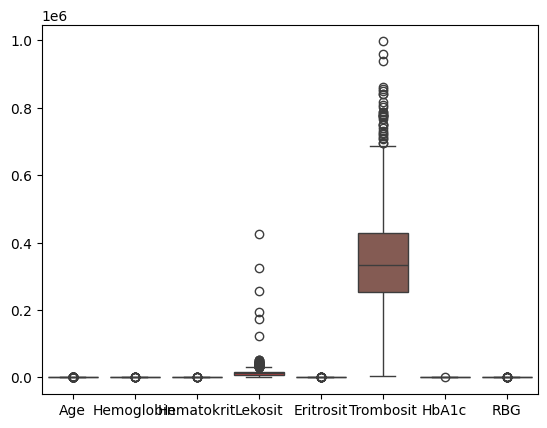

In [ ]:
sns.boxplot(df_null)

In [ ]:
columns = ['Age', 'Hemoglobin', 'Hematokrit', 'Lekosit', 'Eritrosit', 'Trombosit']

for col in columns:
    Q1 = df_null[col].quantile(0.25)
    Q3 = df_null[col].quantile(0.75)
    IQR = Q3 - Q1

    df_null = df_null[df_null[col] >= (Q1 - 1.5 * IQR)]
    df_null = df_null[df_null[col] <= (Q3 + 1.5 * IQR)]

print(df_null)


    Gender  Age              Diagnose  Hemoglobin  Hematokrit  Lekosit  \
67       L   30  DM TYPE 2 + Penyerta        17.6        51.8  22670.0   
68       P   31  DM TYPE 2 + Penyerta        15.5        47.5  27490.0   
69       P   31             DM TYPE 2        14.3        41.6   5620.0   
70       P   31             DM TYPE 2         9.6        26.9   7620.0   
71       L   31             DM TYPE 2        15.6        44.8   2280.0   
..     ...  ...                   ...         ...         ...      ...   
995      L   59  DM TYPE 2 + Penyerta        12.3        36.6  15850.0   
996      P   60             DM TYPE 2        13.1        38.5   9510.0   
997      P   60             DM TYPE 2        13.3        40.8  20560.0   
998      P   60  DM TYPE 2 + Penyerta        15.4        47.3  14320.0   
999      P   60             DM TYPE 2        11.9        37.1   5520.0   

     Eritrosit  Trombosit  HbA1c    RBG  
67        6.55   512000.0    NaN  469.0  
68        6.55   540000.0  

<Axes: >

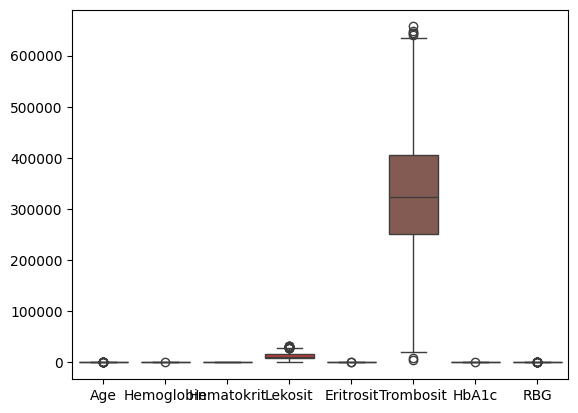

In [ ]:
sns.boxplot(df_null)

In [ ]:
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 67 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      786 non-null    object 
 1   Age         786 non-null    int64  
 2   Diagnose    786 non-null    object 
 3   Hemoglobin  786 non-null    float64
 4   Hematokrit  786 non-null    float64
 5   Lekosit     786 non-null    float64
 6   Eritrosit   786 non-null    float64
 7   Trombosit   786 non-null    float64
 8   HbA1c       549 non-null    float64
 9   RBG         768 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 67.5+ KB


## Missing Value Handling

### Fill Missing Values By Mean & Mode

In [ ]:
df_null.isnull().sum()

,0
Gender,0
Age,0
Diagnose,0
Hemoglobin,0
Hematokrit,0
Lekosit,0
Eritrosit,0
Trombosit,0
HbA1c,237
RBG,18


In [ ]:
df_fill_mean = df_null.fillna(df_null['HbA1c'].mean())

In [ ]:
df_fill_mean.isnull().sum()

,0
Gender,0
Age,0
Diagnose,0
Hemoglobin,0
Hematokrit,0
Lekosit,0
Eritrosit,0
Trombosit,0
HbA1c,0
RBG,0


In [ ]:
df_fill_mode = df_fill_mean.fillna(df_null['RBG'].mode())

In [ ]:
df_fill_mode.isnull().sum()

,0
Gender,0
Age,0
Diagnose,0
Hemoglobin,0
Hematokrit,0
Lekosit,0
Eritrosit,0
Trombosit,0
HbA1c,0
RBG,0


In [ ]:
df_fill_mode.head()

,Gender,Age,Diagnose,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG
67,L,30,DM TYPE 2 + Penyerta,17.6,51.8,22670.0,6.55,512000.0,11.31765,469.0
68,P,31,DM TYPE 2 + Penyerta,15.5,47.5,27490.0,6.55,540000.0,10.80000,606.0
69,P,31,DM TYPE 2,14.3,41.6,5620.0,5.36,230000.0,12.51000,339.0
70,P,31,DM TYPE 2,9.6,26.9,7620.0,3.41,367000.0,13.20000,796.0
71,L,31,DM TYPE 2,15.6,44.8,2280.0,5.74,34000.0,14.10000,275.0


# Data Reduction

## PCA

In [ ]:
columns_pca = ['Age', 'Hemoglobin', 'Hematokrit', 'Lekosit', 'Eritrosit', 'Trombosit', 'HbA1c', 'RBG']
df_pxl = df_fill_mode[columns_pca]

In [ ]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_pxl)

In [ ]:
df_PCA = PCA(n_components=2)
df_PCA.fit(df_scaler)

df = df_PCA.transform(df_scaler)

print(df_scaler)
print(df)

[[-3.13966837e+00  1.95039047e+00  2.00159420e+00 ...  1.44231164e+00
   3.31845188e-16  4.72884540e-01]
 [-2.98516177e+00  1.08096341e+00  1.37917549e+00 ...  1.66242928e+00
  -9.67034034e-02  1.07213824e+00]
 [-2.98516177e+00  5.84147949e-01  5.25159113e-01 ... -7.74587443e-01
   2.22745515e-01 -9.57503574e-02]
 ...
 [ 1.49552949e+00  1.70135065e-01  4.09360283e-01 ...  4.04614198e-01
  -1.18021435e+00 -1.39491503e-01]
 [ 1.49552949e+00  1.03956212e+00  1.35022578e+00 ...  4.83227641e-01
  -1.14285191e+00 -7.16874630e-01]
 [ 1.49552949e+00 -4.09482972e-01 -1.26209307e-01 ... -2.08570655e-01
  -1.03076457e+00 -9.57450933e-01]]
[[ 3.66364555  2.73547345]
 [ 2.80045362  3.56168239]
 [ 1.65277491 -0.70358487]
 ...
 [-0.12747057  0.5678434 ]
 [ 1.4025184  -0.21723922]
 [-0.68136763 -1.72467419]]


## Sampling

In [ ]:
df_fill_mode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786 entries, 67 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      786 non-null    object 
 1   Age         786 non-null    int64  
 2   Diagnose    786 non-null    object 
 3   Hemoglobin  786 non-null    float64
 4   Hematokrit  786 non-null    float64
 5   Lekosit     786 non-null    float64
 6   Eritrosit   786 non-null    float64
 7   Trombosit   786 non-null    float64
 8   HbA1c       786 non-null    float64
 9   RBG         786 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 67.5+ KB


In [ ]:
df_somple = df_fill_mean.sample(frac=0.8, random_state=1)

In [ ]:
df_somple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 975 to 965
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      629 non-null    object 
 1   Age         629 non-null    int64  
 2   Diagnose    629 non-null    object 
 3   Hemoglobin  629 non-null    float64
 4   Hematokrit  629 non-null    float64
 5   Lekosit     629 non-null    float64
 6   Eritrosit   629 non-null    float64
 7   Trombosit   629 non-null    float64
 8   HbA1c       629 non-null    float64
 9   RBG         629 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 54.1+ KB


# Data Transformation

## Normalization With Min-Max Scaling

In [ ]:
df_somple.head()

,Gender,Age,Diagnose,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG
975,P,59,DM TYPE 2 + Penyerta,11.7,30.7,12370.0,3.64,485000.0,14.10000,397.0
196,P,42,DM TYPE 2,11.0,33.0,6080.0,4.27,274000.0,11.31765,370.0
637,P,53,DM TYPE 2 + Penyerta,11.5,33.3,9560.0,4.26,343000.0,15.00000,723.0
393,L,49,DM TYPE 2,16.3,47.2,14270.0,5.50,363000.0,4.00000,277.0
717,P,54,DM TYPE 2 + Penyerta,13.7,41.5,29660.0,4.66,344000.0,11.31765,824.0


In [ ]:
normal_coloumns = ['Age', 'Hemoglobin', 'Hematokrit', 'Lekosit', 'Eritrosit', 'Trombosit', 'HbA1c', 'RBG']
normal_data = df_somple[normal_coloumns]

normalize = MinMaxScaler()
df_normalize = normalize.fit_transform(normal_data)

In [ ]:
print(df_normalize)

[[0.96666667 0.41221374 0.30213904 ... 0.74677645 0.0778659  0.26002674]
 [0.4        0.35877863 0.36363636 ... 0.418984   0.0578057  0.24197861]
 [0.76666667 0.39694656 0.37165775 ... 0.52617679 0.08435472 0.47794118]
 ...
 [0.8        0.55725191 0.5026738  ... 0.45005437 0.0578057  0.43248663]
 [0.56666667 0.54961832 0.55347594 ... 0.56501476 0.08435472 0.22326203]
 [0.96666667 0.49618321 0.48128342 ... 0.38636011 0.05133381 0.2092246 ]]


## Discretization Or Binning

In [ ]:
df_somple.head()

,Gender,Age,Diagnose,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG
975,P,59,DM TYPE 2 + Penyerta,11.7,30.7,12370.0,3.64,485000.0,14.10000,397.0
196,P,42,DM TYPE 2,11.0,33.0,6080.0,4.27,274000.0,11.31765,370.0
637,P,53,DM TYPE 2 + Penyerta,11.5,33.3,9560.0,4.26,343000.0,15.00000,723.0
393,L,49,DM TYPE 2,16.3,47.2,14270.0,5.50,363000.0,4.00000,277.0
717,P,54,DM TYPE 2 + Penyerta,13.7,41.5,29660.0,4.66,344000.0,11.31765,824.0


In [ ]:
df_somple['Age_Category'] = pd.cut(df_somple['Age'],bins = 3, labels=['Young', 'Middle-aged', 'Old'])

In [ ]:
df_somple.head()

,Gender,Age,Diagnose,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG,Age_Category
975,P,59,DM TYPE 2 + Penyerta,11.7,30.7,12370.0,3.64,485000.0,14.10000,397.0,Old
196,P,42,DM TYPE 2,11.0,33.0,6080.0,4.27,274000.0,11.31765,370.0,Middle-aged
637,P,53,DM TYPE 2 + Penyerta,11.5,33.3,9560.0,4.26,343000.0,15.00000,723.0,Old
393,L,49,DM TYPE 2,16.3,47.2,14270.0,5.50,363000.0,4.00000,277.0,Middle-aged
717,P,54,DM TYPE 2 + Penyerta,13.7,41.5,29660.0,4.66,344000.0,11.31765,824.0,Old


## One-Hot Encoding

In [ ]:
df_hot_ones = pd.get_dummies(df_somple, columns=['Gender', 'Diagnose'])

In [ ]:
df_hot_ones.head()

,Age,Hemoglobin,Hematokrit,Lekosit,Eritrosit,Trombosit,HbA1c,RBG,Age_Category,Gender_L,Gender_P,Diagnose_DM TYPE 2,Diagnose_DM TYPE 2 + Penyerta
975,59,11.7,30.7,12370.0,3.64,485000.0,14.10000,397.0,Old,False,True,False,True
196,42,11.0,33.0,6080.0,4.27,274000.0,11.31765,370.0,Middle-aged,False,True,True,False
637,53,11.5,33.3,9560.0,4.26,343000.0,15.00000,723.0,Old,False,True,False,True
393,49,16.3,47.2,14270.0,5.50,363000.0,4.00000,277.0,Middle-aged,True,False,True,False
717,54,13.7,41.5,29660.0,4.66,344000.0,11.31765,824.0,Old,False,True,False,True
